In [7]:
import json
import numpy as np
import pandas as pd
import os
import h5py

%matplotlib inline
import matplotlib.pyplot as plt


In [54]:
X = []
y = []
with h5py.File("behaviours.hdf5", 'r') as ds:
    for i, key in enumerate(ds):
        print("Loading", key)
        X.append(ds[key][...])
        y.append(np.ones(ds[key].shape[0])*i)
        
        
X = np.concatenate(X, axis=0)
X[np.isnan(X)] = 0
y = np.concatenate(y, axis=0)

print(X.shape, y.shape)

('Loading', u'frontal_swings_upwards')
('Loading', u'lateral_rotations_clockwise')
('Loading', u'marker_up')
('Loading', u'marker_up_frontal_swing')
('Loading', u'marker_up_lateral_rotations')
('Loading', u'marker_up_lateral_swing')
('Loading', u'motor_marker_1')
('Loading', u'random_motions')
((92514, 13), (92514,))


In [13]:
# Pose information (= motor camera image, (x,y,z) + quaternion)
X_pose = X[:,0:7]
X_pos = X[:,0:3]
# Motor displacements
X_disp = X[:,7:]
X_disp[X_disp < 0] = 0

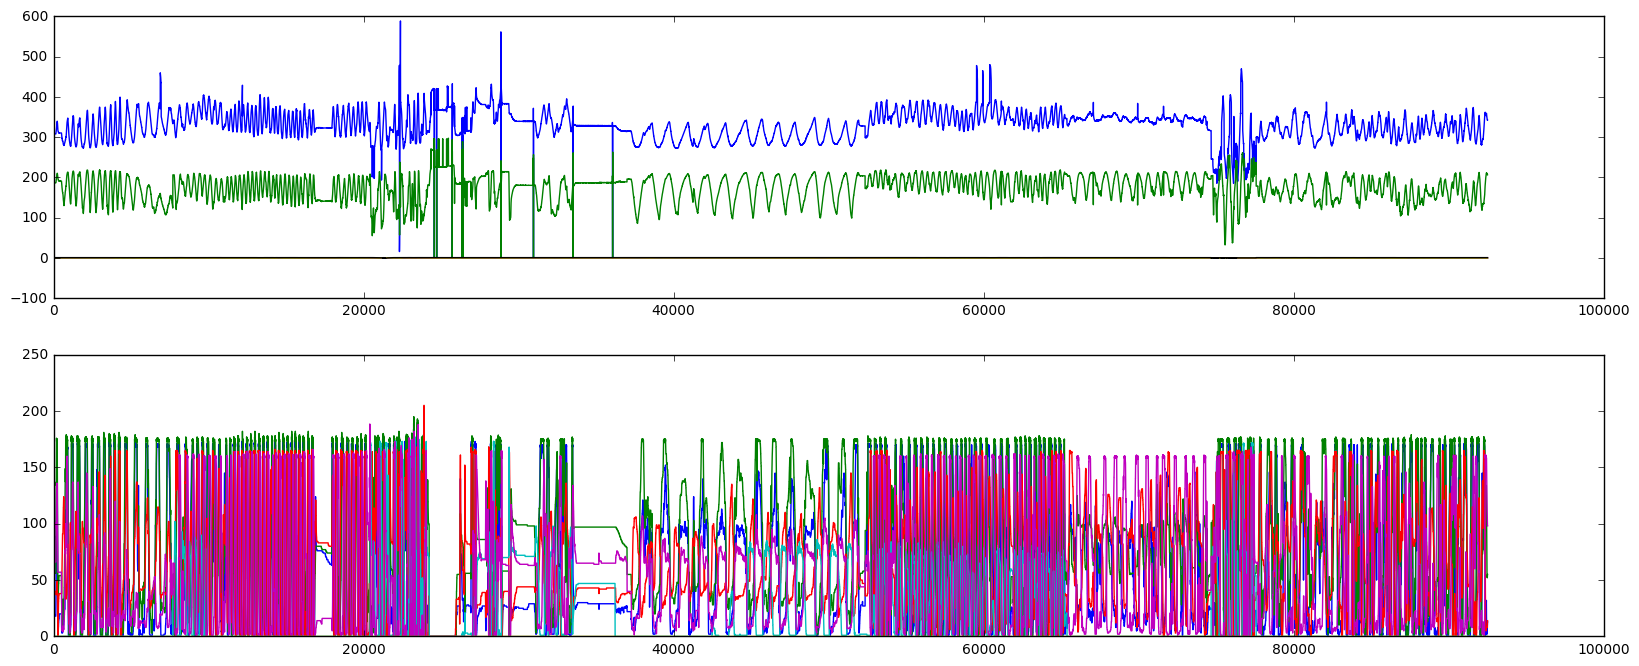

In [8]:
_, axes = plt.subplots(2,1,figsize=(20,8))
axes[0].plot(X_pose)
axes[1].plot(X_disp)
plt.show()

(92514, 3)

## SVM Regression

In [42]:
def predict_displacements(reg, X_pos, X_disp):
    pred = reg.predict(X_pos[90000:])
    plt.figure(figsize=(6,8)) # blue = ground truth; green= prediction

    for i in range(6):
        plt.subplot(6,1,i+1)
        plt.plot(X_disp[90000:,i]) # motor 1
        plt.plot(pred[:,i])

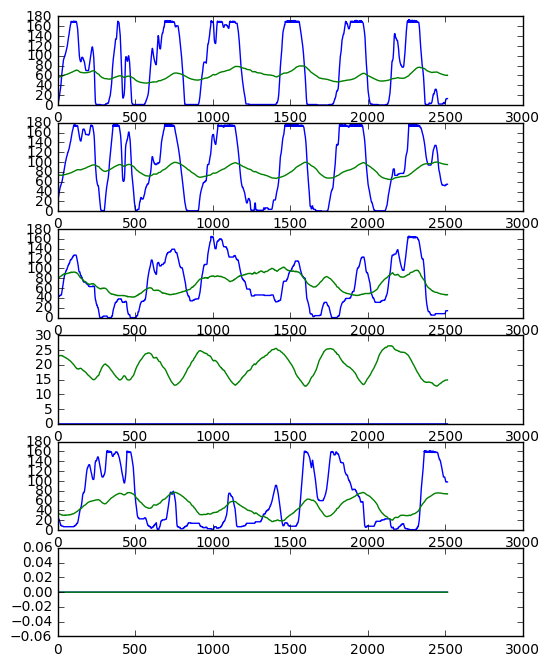

In [47]:
#from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_pos[0:90000], X_disp[0:90000])
predict_displacements(reg,X_pos,X_disp)

## Ridge Regression

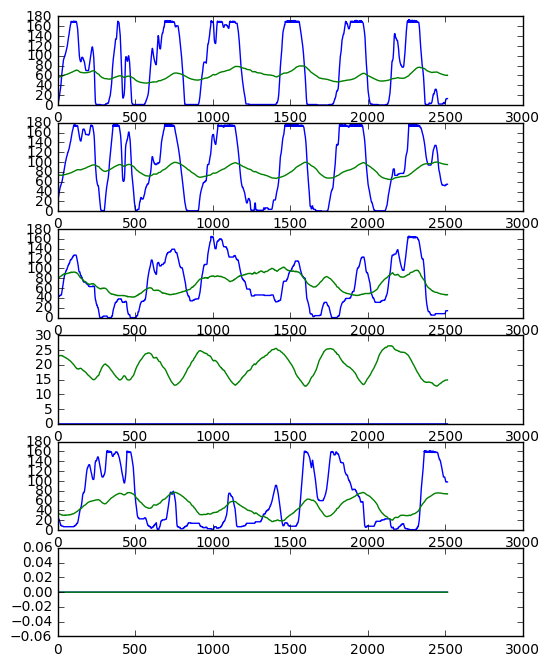

In [46]:
from sklearn import linear_model
reg = linear_model.Ridge()
reg.fit(X_pos[0:90000], X_disp[0:90000])
predict_displacements(reg,X_pos,X_disp)

## Decision Tree Regression

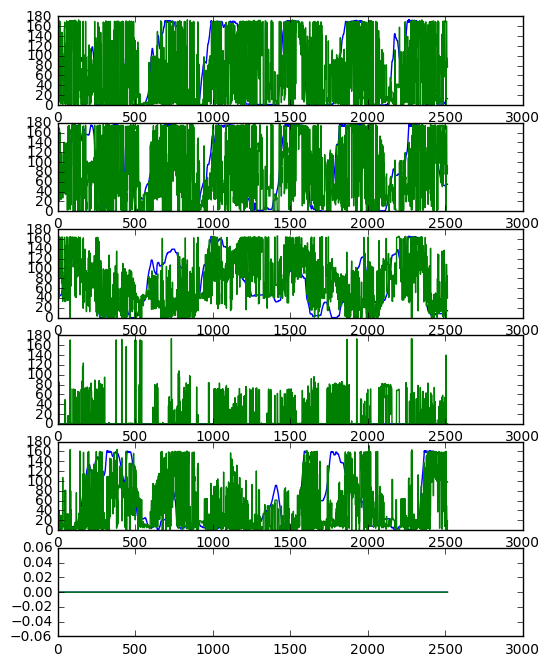

In [53]:
from sklearn import tree
reg = tree.DecisionTreeRegressor()
reg.fit(X_pos[0:90000], X_disp[0:90000])
predict_displacements(reg,X_pos,X_disp)